In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import requests
import json

def get_us_data():
    URL = 'https://api.covidtracking.com/v1/us/current.json'
    headers = {'User-Agent': 'Mozilla/5.0'}
    r = requests.get(URL, verify=True, timeout=None, headers=headers)
    data = json.loads(r.text)
    return data[0]['death']

rcParams.update({'figure.autolayout': True})

cToll = get_us_data()
days = (datetime.now() - datetime(2020, 2, 6)).days

figures = {
    # Cause:         [Death toll, graph color, label, length of time]
    'korea':         [33686, 'grey', 'Korean War (3 years)', 1095],
    'vietnam':       [47424, 'grey', 'Vietnam (10 years)', 3650],
    'afghanistan':   [1833, 'grey', 'War in Afghanistan (19 years)', 6935],
    'iraq':          [3836, 'grey', 'Iraq War (8 years)', 6935],
    'heart_disease': [647457, 'g', 'Heart Disease (1 year)', 365],
    'cancer':        [599108, 'g', 'Cancer (1 year)', 365],
    'copd':          [160201, 'g', 'COPD (1 year)', 365],
    'stroke':        [146383, 'g', 'Stroke (1 year)', 365],
    'alzheimers':    [121404, 'g', "Alzheimer's (1 year)", 365],
    'diabetes':      [83564, 'g', 'Diabetes (1 year)', 365],
    'accidents':     [169936, 'orange', 'Accidents (1 year)', 365],
    'suicide':       [47173, 'orange', 'Suicide (1 year)', 365],
    'murder':        [16214, 'orange', 'Murder (1 year)', 365],   # 2018
    'pneumonia':     [49157, 'r', 'Pneumonia (1 year)', 365],     # 2017
    'flu':           [34200, 'r', 'Influenza (147 days)', 147],   # 2018-2019 season
    'covid':         [cToll, 'r', 'COVID-19 ({} days)'.format(days), days]
}

x = ['accidents', 'suicide', 'murder', 'korea', 'vietnam', 'afghanistan', 'iraq', 'heart_disease', 'cancer', 'copd',
    'stroke', 'alzheimers', 'diabetes', 'flu', 'pneumonia', 'covid']

def graph_one():
    plt.figure(figsize=(8, 5))
    plt.title("US Deaths: COVID-19 vs Other Causes")
    plt.ylabel("Cause of Death")
    plt.xlabel("Death Toll")
    
    y = [figures[i][0] for i in x]
    
    s = pd.Series(
        y,
        index= [figures[i][2] for i in x]
    )
    
    colors = [figures[i][1] for i in x]
    
    s.plot(
        kind='barh',
        color=colors,
        label='__nolegend__'
    )
    
    plt.axvline(x=figures['covid'][0], color='k', linestyle=':', alpha=0.6)
    
    plt.barh(0, 0, color='r', label='Infectious Disease')
    plt.barh(0, 0, color='g', label='Non-infectious Disease')
    plt.barh(0, 0, color='grey', label='War')
    plt.barh(0, 0, color='orange', label='Other')
    
    plt.legend()
    plt.show()

def graph_two():
    plt.figure(figsize=(8, 5))
    plt.title("Ave. US Daily Deaths: COVID-19 vs Other Causes")
    plt.ylabel("Cause of Death")
    plt.xlabel("Death Toll")
    
    y = [figures[i][0] / figures[i][3] for i in x]
    
    s = pd.Series(
        y,
        index= [figures[i][2] for i in x]
    )
    
    colors = [figures[i][1] for i in x]
    
    s.plot(
        kind='barh',
        color=colors,
        label='__nolegend__'
    )
    
    plt.axvline(x=figures['covid'][0] / figures['covid'][3], color='k', linestyle=':', alpha=0.6)
    
    plt.barh(0, 0, color='r', label='Infectious Disease')
    plt.barh(0, 0, color='g', label='Non-infectious Disease')
    plt.barh(0, 0, color='grey', label='War')
    plt.barh(0, 0, color='orange', label='Other')
    
    plt.legend()
    plt.show()

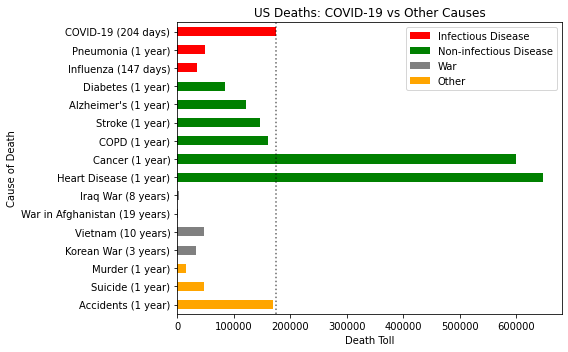

In [2]:
graph_one()

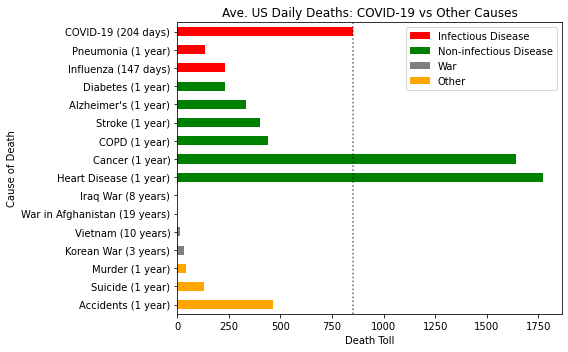

In [3]:
graph_two()